In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import Dataset

In [2]:
# Import the dataset
heart_df = pd.read_excel('heart.xlsx', sheet_name = 'heart')
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Description

In [3]:
# Print basic information of the dataset
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Show the statistical information of the dataset
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Tried Pandas Profiling to generate a better report
pp.ProfileReport(heart_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Analysis

In [6]:
# Create a copy of the original dataset
heart_copy = heart_df.copy()
# Create the independent columns and the output column
X = heart_copy.drop('output', axis = 1)
y = heart_copy.output
# Calculate the chi2 measure
chi2_features = SelectKBest(score_func=chi2, k=10)
fit = chi2_features.fit(X, y)
chi2_scores = pd.DataFrame(fit.scores_)
# Generate a dataframe containing the chi2 scores and the variable names
columns = pd.DataFrame(X.columns)
featureScores = pd.concat([columns, chi2_scores], axis = 1)
featureScores.columns = ['Variables','Score']
print(featureScores.nlargest(12, 'Score'))

   Variables       Score
7   thalachh  188.320472
9    oldpeak   72.644253
11       caa   66.440765
2         cp   62.598098
8       exng   38.914377
4       chol   23.936394
0        age   23.286624
3     trtbps   14.823925
10       slp    9.804095
1        sex    7.576835
12     thall    5.791853
6    restecg    2.978271


[0.06677733 0.05139554 0.12734921 0.06089974 0.05693867 0.02067842
 0.03317987 0.08430457 0.10399644 0.0855242  0.07277302 0.12565902
 0.11052395]


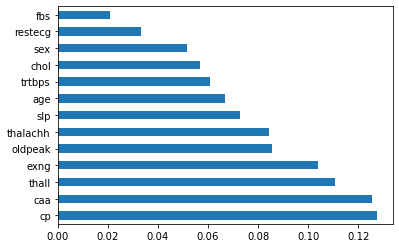

In [7]:
# This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) 
# on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

# Perform a extra-trees classifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)
# Show the bar graph of these importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind = 'barh')
plt.show()

<AxesSubplot:>

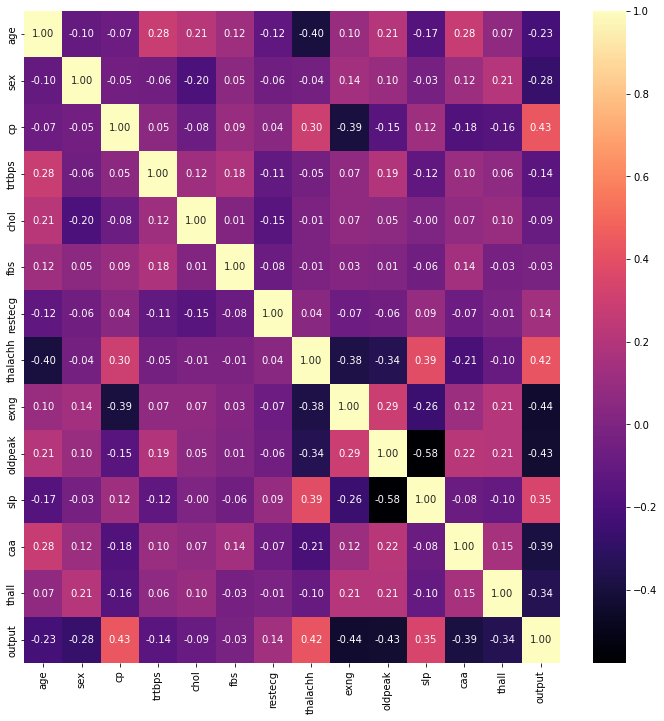

In [8]:
# Generate a heatmap of the correlations of the variables
plt.figure(figsize=(12,12))
sns.heatmap(heart_df.corr(), annot = True, cmap = "magma", fmt = '.2f')

From the correlation matrix, there are no variables are highly correlated (>0.7). We are going to keep all the variables.

There are pairs of variables are moderately correlated.
1. thalachh and age (-0.4)
2. thalachh and cp(0.3)
3. exng and cp (-0.39)
4. thalachh and exng (-0.38)
5. thalachh and oldpeak (-0.34)
6. thalachh and slp (0.39)
7. slp and oldpeak (-0.58)

# Variable Selection

In [9]:
#Use VIF to find collinearity
#Create VIF dataframe
X = heart_copy.drop('output', axis = 1)
vif_heart = pd.DataFrame()
vif_heart["feature"] = X.columns
vif_heart["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

#Print VIF dataframe
print(vif_heart)

     feature        VIF
0        age  38.998305
1        sex   3.523211
2         cp   2.414403
3     trtbps  58.557335
4       chol  26.267365
5        fbs   1.268205
6    restecg   2.058206
7   thalachh  42.742178
8       exng   2.022527
9    oldpeak   3.062890
10       slp  10.072734
11       caa   1.808925
12     thall  17.165303


From the VIF values, age, trtbps, chol, thalachh, slp, and thall have severe collinearity.

1. thalachh, it correlated with five variables (age, cp, exng, oldpeak, and slp) and has a VIF = 42.7422.
2. slp, it correlated with oldpeak and has a VIF = 10.0727.
3. cp, it correlated with exng and the correlation between cp and output is less stronger than exng with output.
 

# Data Visualization

In [10]:
# Create another copy of the dataset
df_copy = heart_df.copy()
# Change some of the variables to texts
df_copy['sex'] = np.where(df_copy['sex'] == 1, 'male', 'female')
df_copy['output'] = np.where(df_copy['output'] == 1, 'Heart Disease', 'No Heart Disease')
df_copy['cp'] = pd.cut(df_copy.cp,
                       bins = [-np.inf, 0, 1, 2, 3],
                       labels = ["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
df_copy['thall'] = pd.cut(df_copy.thall,
                          bins = [-np.inf, 0, 1, 2, 3],
                          labels = ["NULL", "Fixed Defect", "Normal", "Reversable Defect"])
df_copy['exng'] = np.where(df_copy['exng'] == 1, 'Yes', 'No')

# Check whether the change was successful
df_copy

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,male,Asymptomatic,145,233,1,0,150,No,2.3,0,0,Fixed Defect,Heart Disease
1,37,male,Non-anginal Pain,130,250,0,1,187,No,3.5,0,0,Normal,Heart Disease
2,41,female,Atypical Angina,130,204,0,0,172,No,1.4,2,0,Normal,Heart Disease
3,56,male,Atypical Angina,120,236,0,1,178,No,0.8,2,0,Normal,Heart Disease
4,57,female,Typical Angina,120,354,0,1,163,Yes,0.6,2,0,Normal,Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,Typical Angina,140,241,0,1,123,Yes,0.2,1,0,Reversable Defect,No Heart Disease
299,45,male,Asymptomatic,110,264,0,1,132,No,1.2,1,0,Reversable Defect,No Heart Disease
300,68,male,Typical Angina,144,193,1,1,141,No,3.4,1,2,Reversable Defect,No Heart Disease
301,57,male,Typical Angina,130,131,0,1,115,Yes,1.2,1,1,Reversable Defect,No Heart Disease


Text(0.5, 1.0, 'Gender vs Output')

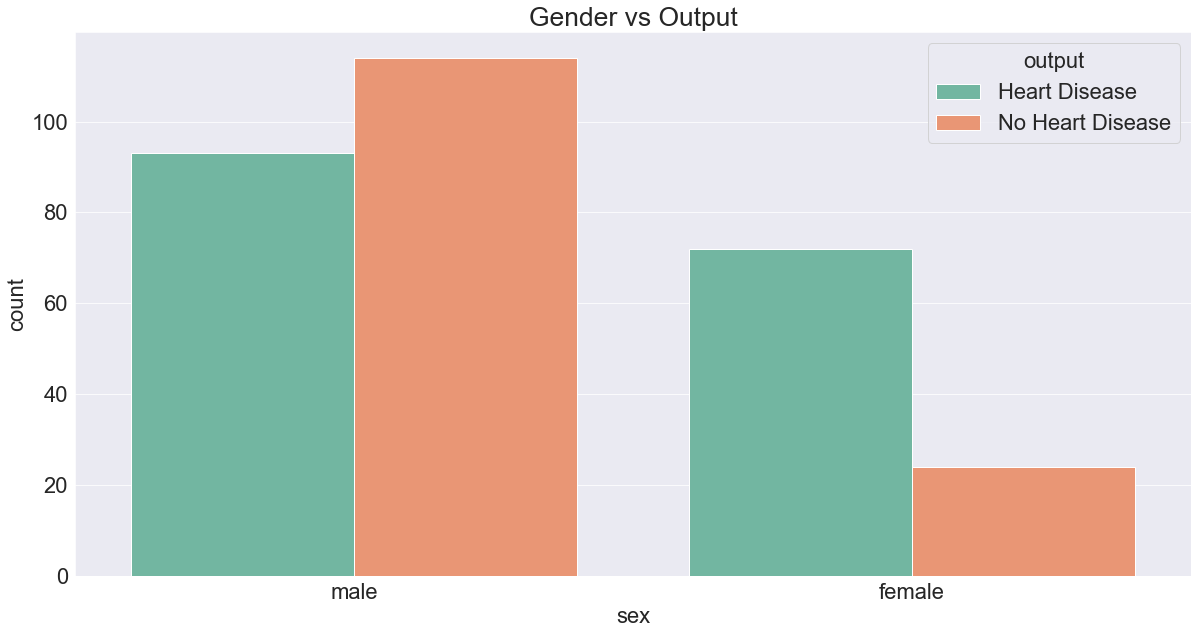

In [11]:
# Set style of the plots
sns.set_style('darkgrid')
sns.set_palette('Set2')
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams.update({'font.size': 22})
# Make a plot of Gender vs Output
sns.countplot(data = df_copy, x = 'sex', hue = 'output')
plt.title('Gender vs Output')

Text(0.5, 1.0, 'Chest Pain Type vs Heart Attack Output')

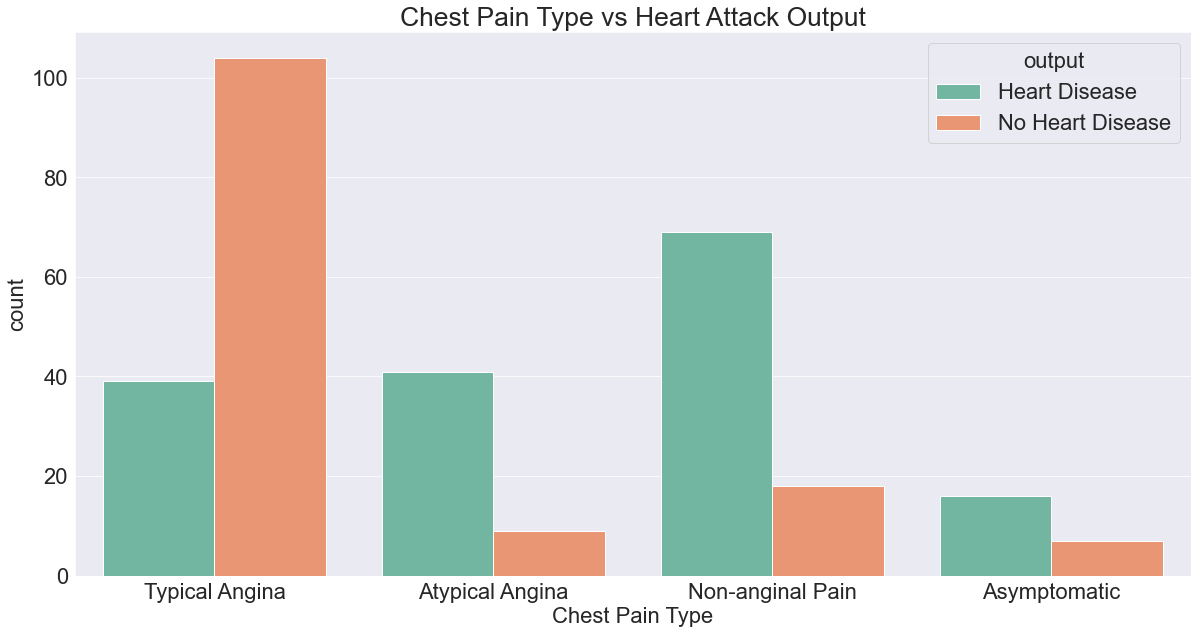

In [12]:
# Make a plot that compares the chest pain type and heart attck output
sns.countplot(data = df_copy, x = 'cp', hue = 'output')
plt.xlabel('Chest Pain Type')
plt.title('Chest Pain Type vs Heart Attack Output')

Text(0.5, 1.0, 'Gender vs Thalassemia')

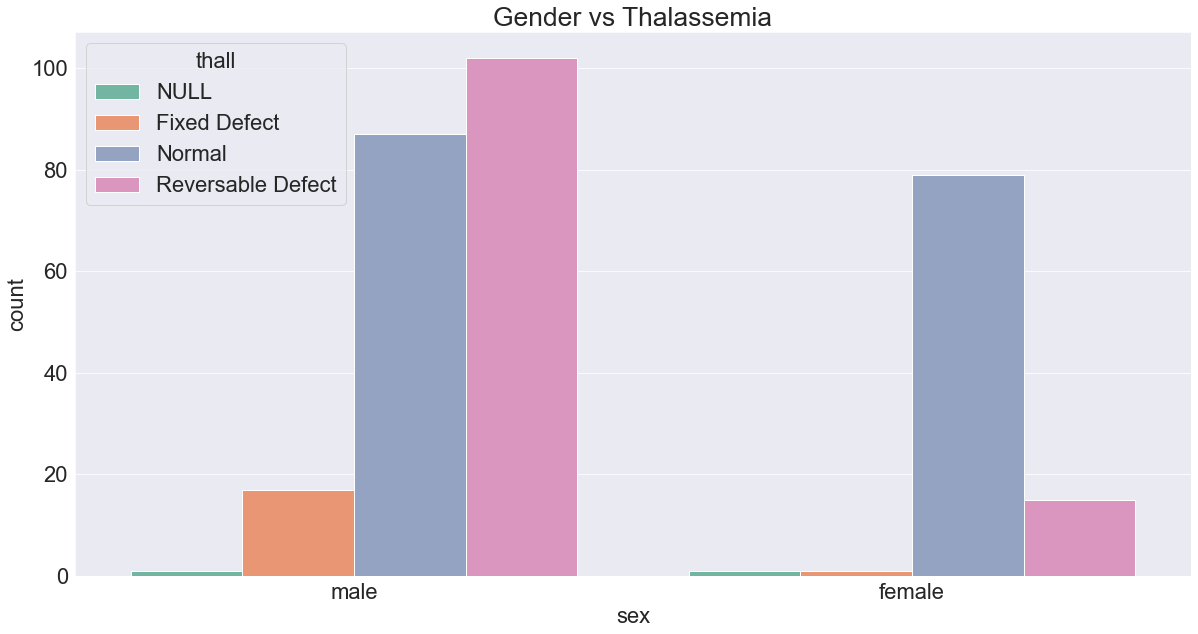

In [13]:
# Make a plot that shows Gender and Thalassemia
sns.countplot(data = df_copy, x = 'sex', hue = 'thall')
plt.title('Gender vs Thalassemia')

Text(0.5, 1.0, 'Slope vs Heart Attack Output')

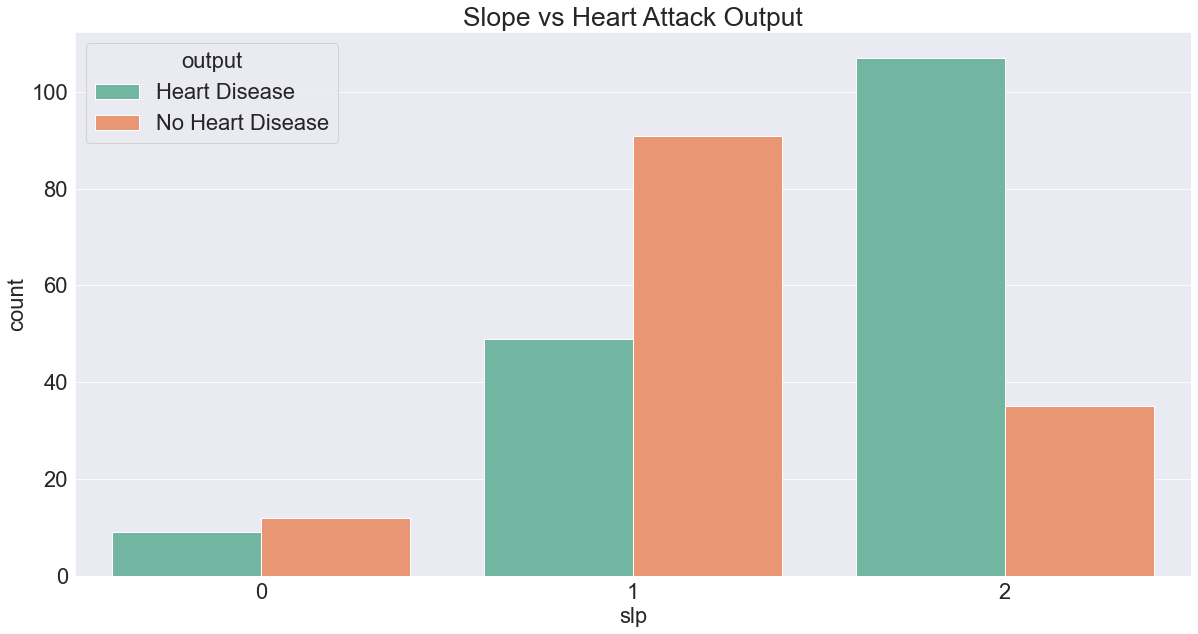

In [14]:
# Make a plot that shows the slope and heart attck output
sns.countplot(data = df_copy, x = 'slp', hue = 'output')
plt.title('Slope vs Heart Attack Output')

Text(0.5, 1.0, 'Exercise Induced Angina vs Thalassemia')

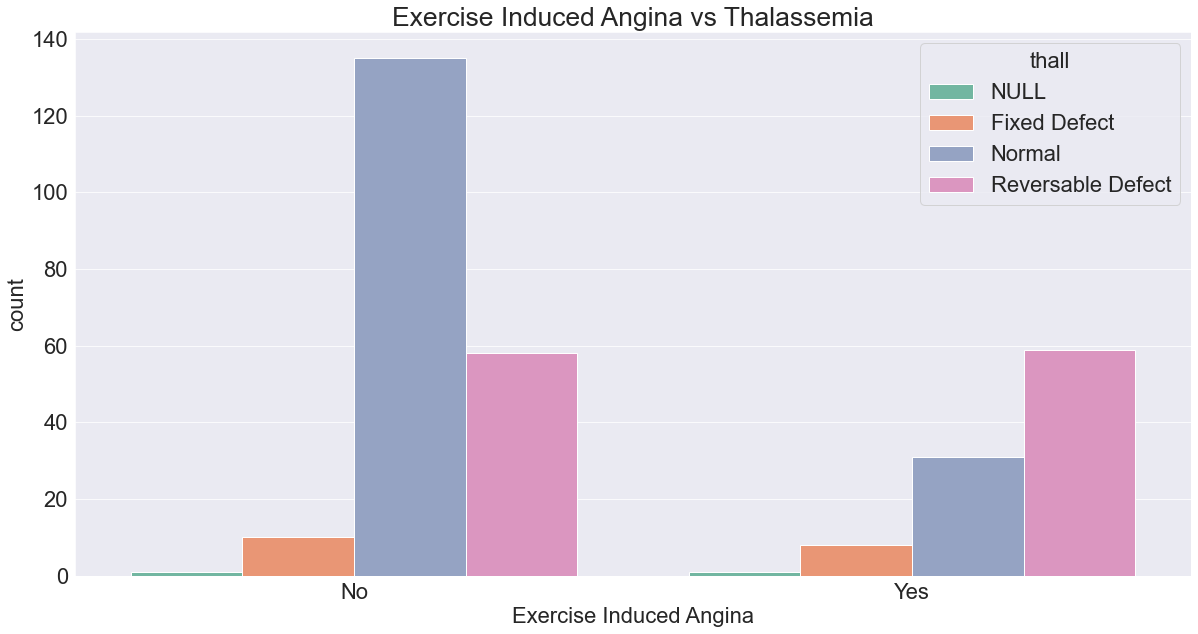

In [15]:
# Make a plot that shows exercise induced angina and thalassemia
sns.countplot(data = df_copy, x = 'exng', hue = 'thall')
plt.xlabel('Exercise Induced Angina')
plt.title('Exercise Induced Angina vs Thalassemia')

Text(0.5, 1.0, 'Age of Heart Diseased Patients')

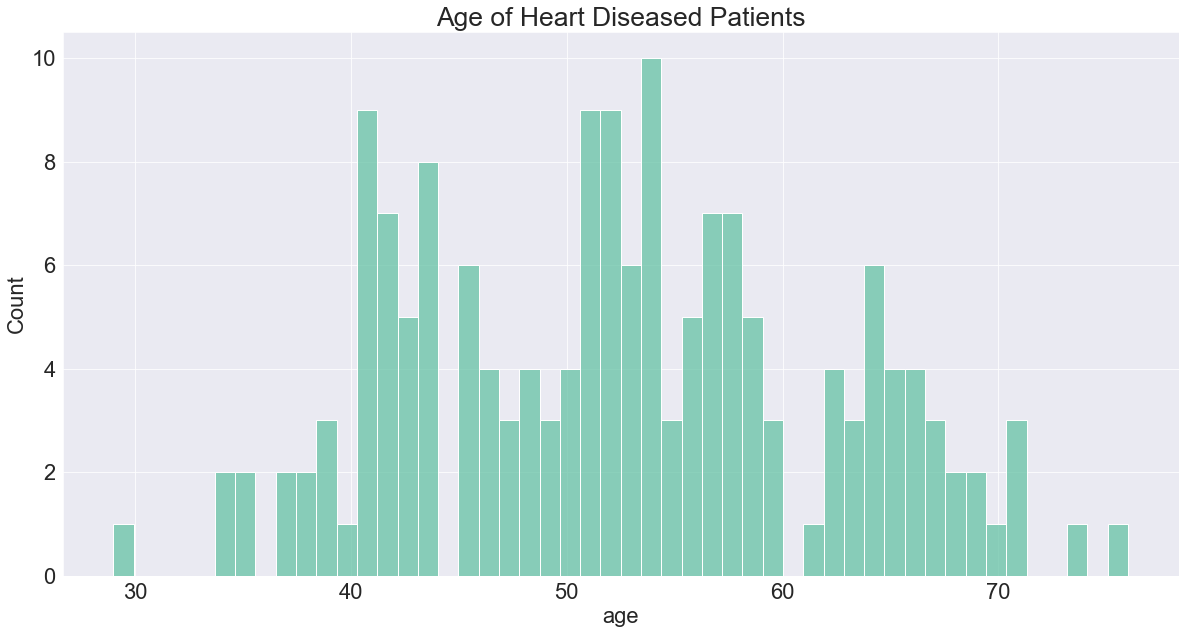

In [16]:
# Makes a histogram to show the age distribution of patients with heart disease
sns.histplot(df_copy[df_copy['output'] == 'Heart Disease']['age'], kde = False, bins = 50)
plt.title('Age of Heart Diseased Patients')

Text(0.5, 1.0, 'Chol of Heart Diseased Patients')

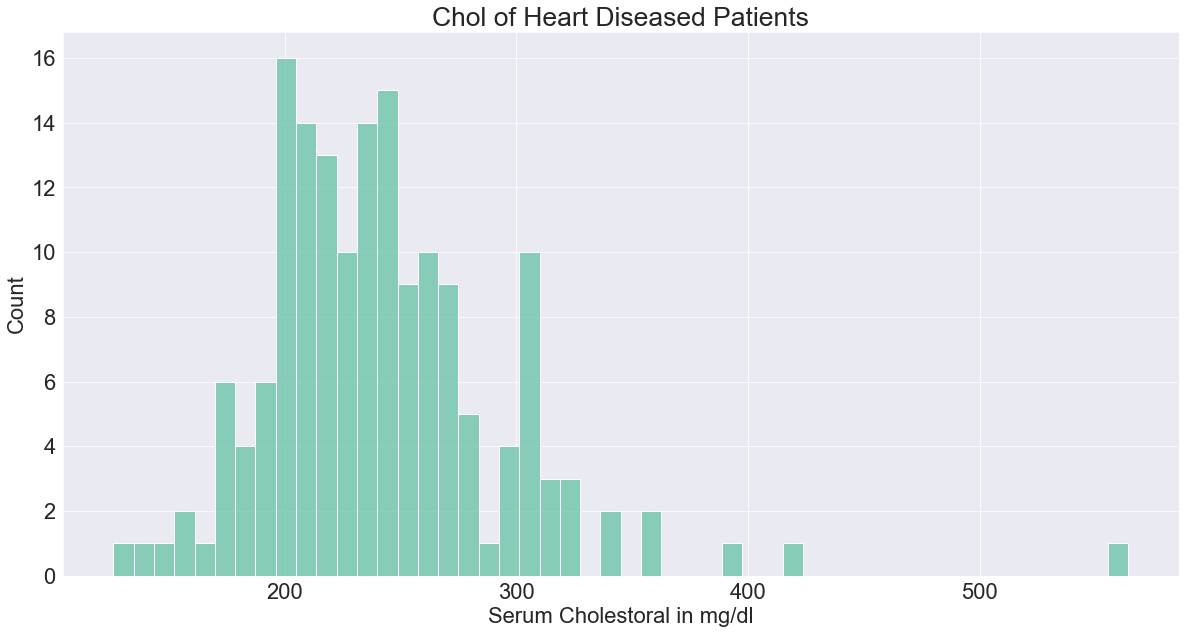

In [17]:
# Makes a histogram that shows the serum cholestoral distribution of patients with heart disease
sns.histplot(df_copy[df_copy['output'] == 'Heart Disease']['chol'], kde = False, bins = 50)
plt.xlabel('Serum Cholestoral in mg/dl')
plt.title('Chol of Heart Diseased Patients')

Text(0.5, 1.0, 'Maximum Heart Rate Achieved of Heart Diseased Patients')

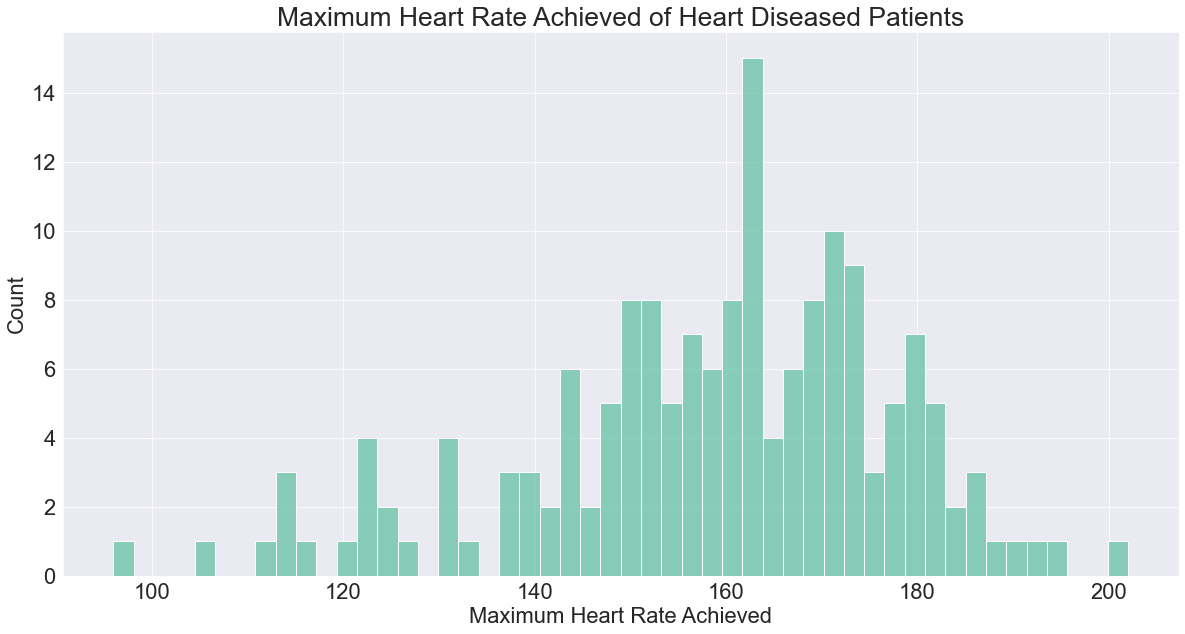

In [18]:
# Makes a histogram that shows the maximum heart rate distribution of the patients with heart disease
sns.histplot(df_copy[df_copy['output'] == 'Heart Disease']['thalachh'], kde = False, bins = 50)
plt.xlabel('Maximum Heart Rate Achieved')
plt.title('Maximum Heart Rate Achieved of Heart Diseased Patients')

Text(0.5, 1.0, 'Exercise Induced Angina of Heart Diseased Patients')

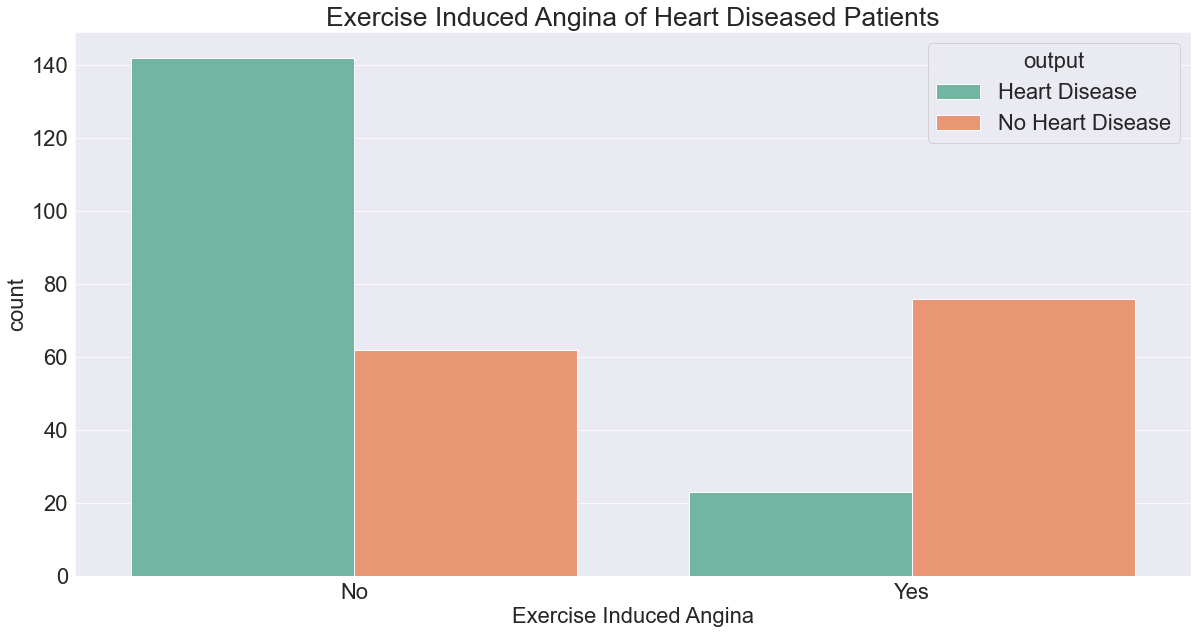

In [19]:
# Makes a histogram to show the exercise induced angina distribution of patients with heart disease
sns.countplot(data = df_copy, x = 'exng', hue = 'output')
plt.xlabel('Exercise Induced Angina')
plt.title('Exercise Induced Angina of Heart Diseased Patients')

Text(0.5, 1.0, 'Number of Major Vessels vs Heart Attack Output')

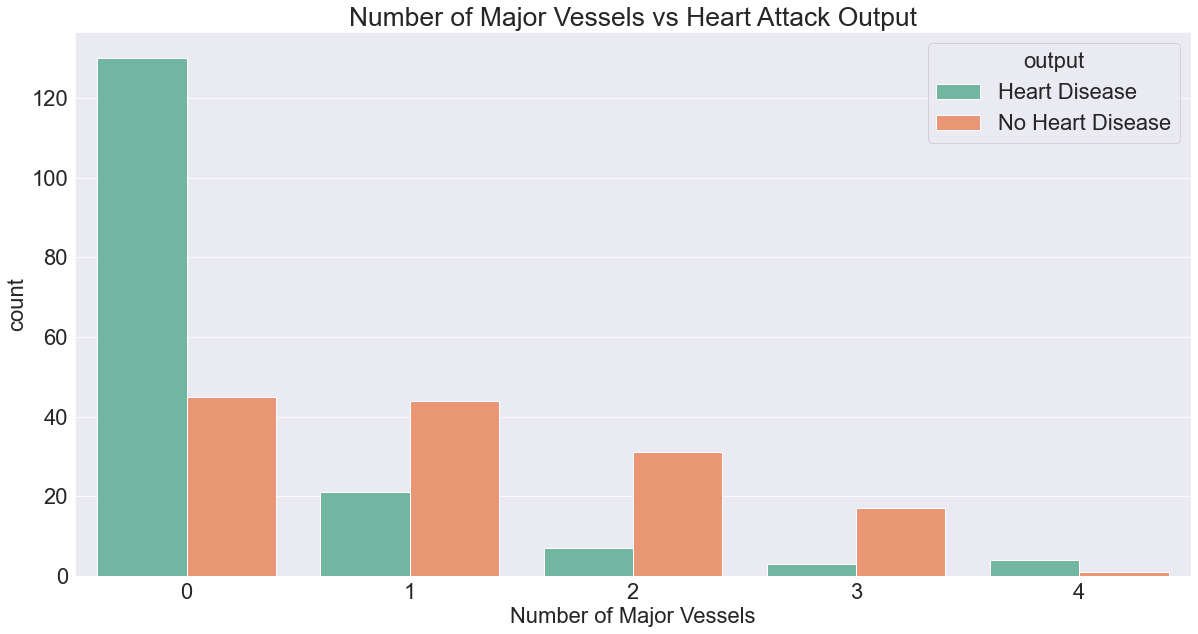

In [20]:
# Makes a histogram to show the number of major vessels distribution of patients with heart disease
sns.countplot(data = df_copy, x = 'caa', hue = 'output')
plt.xlabel('Number of Major Vessels')
plt.title('Number of Major Vessels vs Heart Attack Output')

Text(0.5, 1.0, 'Resting Blood Pressure of Heart Diseased Patients')

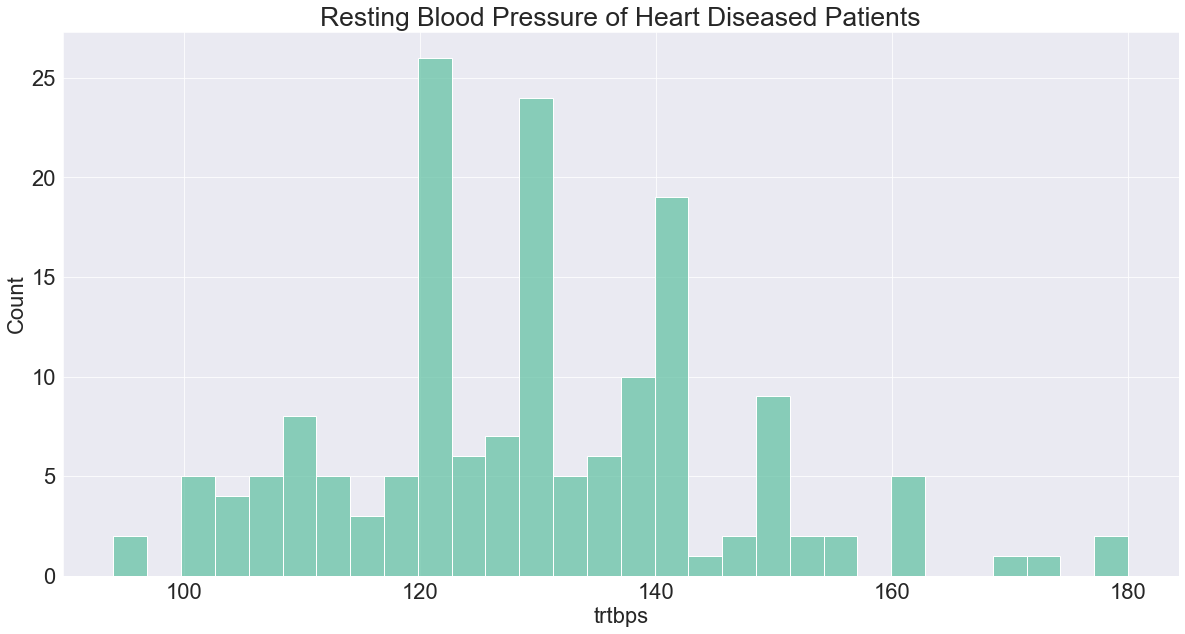

In [21]:
# Makes a histogram to show theresting blood pressure distribution of patients with heart disease
sns.histplot(df_copy[df_copy['output'] == 'Heart Disease']['trtbps'], kde = False, bins = 30)
plt.title('Resting Blood Pressure of Heart Diseased Patients')

Text(0.5, 1.0, 'Fasting Blood Sugar vs Heart Attack Output')

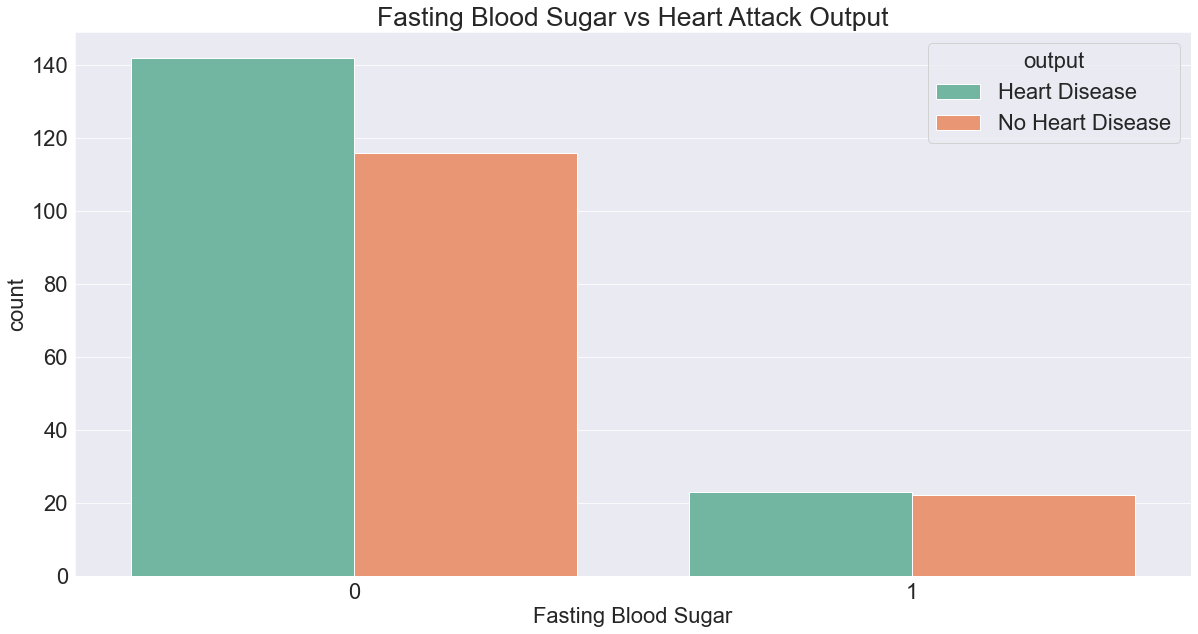

In [22]:
# Makes a histogram to show the fasting blood sugar distribution of patients with heart disease
sns.countplot(data = df_copy, x = 'fbs', hue = 'output')
plt.xlabel('Fasting Blood Sugar')
plt.title('Fasting Blood Sugar vs Heart Attack Output')

Text(0.5, 1.0, 'Resting Electrocardiographic Results vs Heart Attack Output')

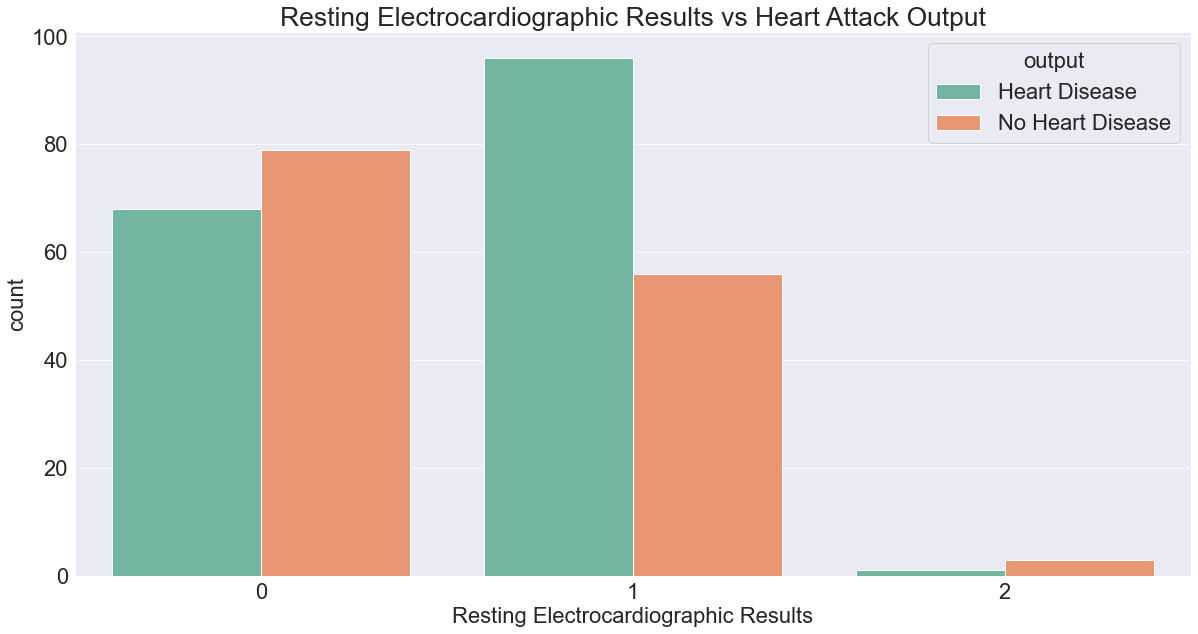

In [23]:
# Makes a histogram to show the resting electrocardiographic results distribution of patients with heart disease
sns.countplot(data = df_copy, x = 'restecg', hue = 'output')
plt.xlabel('Resting Electrocardiographic Results')
plt.title('Resting Electrocardiographic Results vs Heart Attack Output')

Text(0.5, 1.0, 'Oldpeak of Heart Diseased Patients')

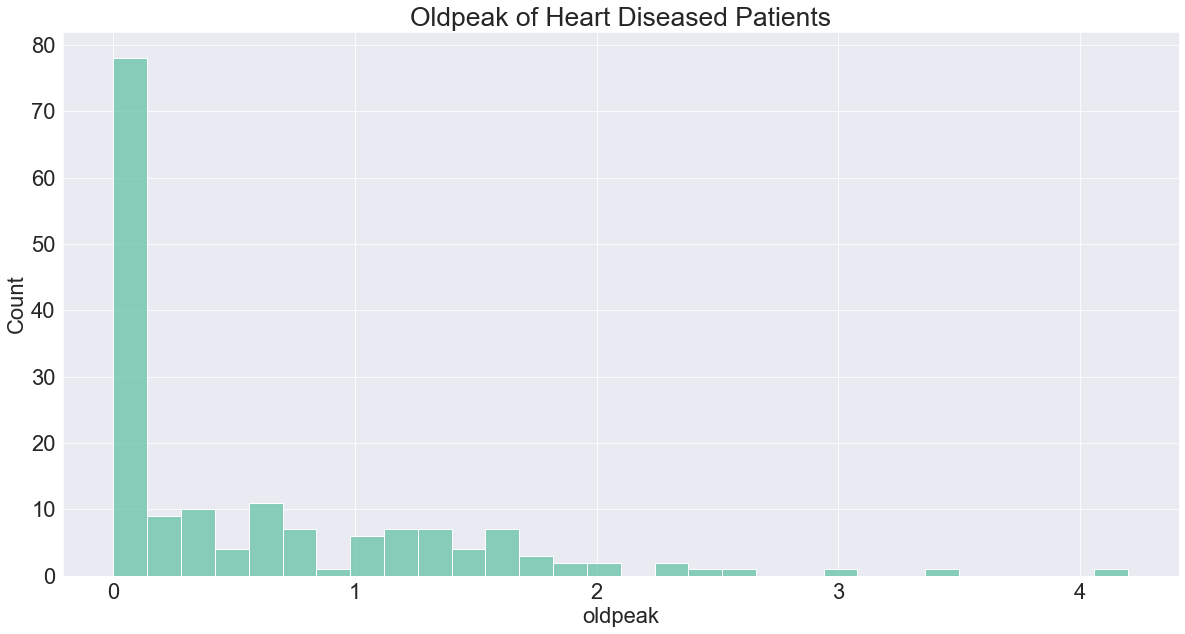

In [24]:
# Makes a histogram to show old peak distribution of patients with heart disease
sns.histplot(df_copy[df_copy['output'] == 'Heart Disease']['oldpeak'], kde = False, bins = 30)
plt.title('Oldpeak of Heart Diseased Patients')

Text(0.5, 1.0, 'Thalassemia vs Heart Attack Output')

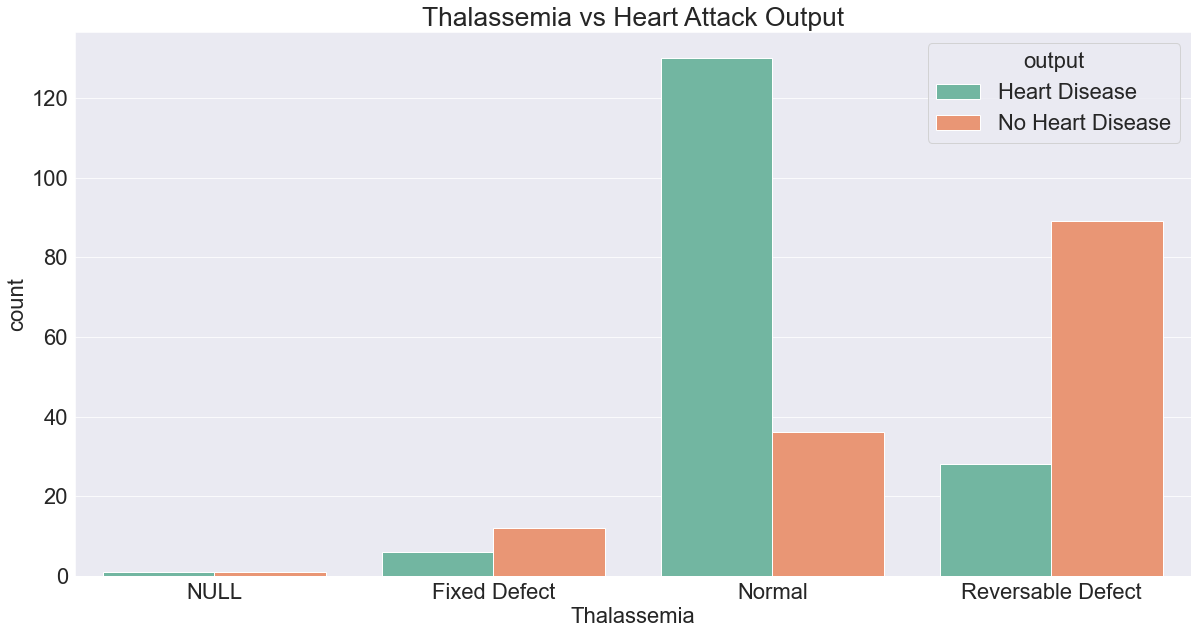

In [25]:
# Makes a histogram to show the thalassemia distribution of patients with heart disease
sns.countplot(data = df_copy, x = 'thall', hue = 'output')
plt.xlabel('Thalassemia')
plt.title('Thalassemia vs Heart Attack Output')

# Decision Tree

In [26]:
# Makes indepent columns and output column
X = heart_df.drop('output', axis = 1)
y = heart_df.output
# Makes training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Perfrom a decision tree classification
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
y_prediction = decision_tree.predict(X_test)
# Show the accuracy and confusion matrix
print("Accuracy:", accuracy_score(y_test, y_prediction))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_prediction))

Accuracy: 0.7377049180327869
Confusion Matrix:
 [[22  8]
 [ 8 23]]


# Logistic Regression

In [27]:
# Construct the logistic regression and print the marginal effect summary table
logit_regression = smf.logit("output ~ age + sex + oldpeak + trtbps + chol + fbs + C(restecg) + C(thall) + exng + caa + thalachh + slp + C(cp)", data = heart_df).fit()
logit_regression.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.337233
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                 output
Method:                          dydx
At:                           overall
===================================================================================
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
C(restecg)[T.1]     0.0617      0.039      1.601      0.109      -0.014       0.137
C(restecg)[T.2]    -0.0359      0.243     -0.148      0.882      -0.511       0.439
C(thall)[T.1]       0.1936      0.225      0.860      0.390      -0.247       0.635
C(thall)[T.2]       0.1954      0.214      0.912      0.362      -0.225       0.615
C(thall)[T.3]       0.0455      0.217      0.210      0.834      -0.379       0.470
C(cp)[T.1]          0.1122      0.057      1.957      0.050      -0.000       0.225
C(cp)[T.2]          0.2023      0.045      4.541      0.000       0.115       0.290
C(cp)[T.3]          0.2069      0.063      3.259      0.001       0.082       0.331
age                -0.0002      0.002     -0.078      0.938      -0.005       0.005
sex                -0.1536      0.052     -2.972      0.003      -0.255      -0.052
oldpeak            -0.0503      0.023     -2.165      0.030      -0.096      -0.005
trtbps             -0.0018      0.001     -1.605      0.108      -0.004       0.000
chol               -0.0005      0.000     -1.283      0.200      -0.001       0.000
fbs                 0.0205      0.058      0.351      0.726      -0.094       0.135
exng               -0.0845      0.043     -1.946      0.052      -0.170       0.001
caa                -0.0864      0.019     -4.521      0.000      -0.124      -0.049
thalachh            0.0021      0.001      1.969      0.049     9.4e-06       0.004
slp                 0.0533      0.038      1.396      0.163      -0.022       0.128
===================================================================================
"""

In [28]:
# Crtaed the predictor values and the outcome variables
X1 = heart_df[["age", "sex", "oldpeak", "trtbps", "chol", "fbs", "restecg", "thall", "exng", "caa", "cp", 'slp', 'thalachh']]
X = pd.get_dummies(X1, drop_first = True, columns = ["thall", "restecg", "cp"]).values
y = heart_df["output"].values
# Create a logistic regression model with sklearn
sklearn_logistic = LogisticRegression(penalty = 'none', solver = 'newton-cg').fit(X,y)

In [29]:
# Print the coefficients and intercept of the sklearn model
print('Coefficients:', sklearn_logistic.coef_)
print('Intercept:', sklearn_logistic.intercept_)

Coefficients: [[-1.82918340e-03 -1.46010812e+00 -4.77713312e-01 -1.69248008e-02
  -4.90933259e-03  1.94890869e-01 -8.02902733e-01 -8.20947480e-01
   5.06597694e-01  2.02654101e-02  1.84022063e+00  1.85704343e+00
   4.32188539e-01  5.86711687e-01 -3.40956594e-01  1.06688836e+00
   1.92305315e+00  1.96668935e+00]]
Intercept: [-0.1944671]


In [30]:
# Compute the probability of having a heart attack
heart_atk_prob = sklearn_logistic.predict_proba(X)
heart_atk_prob = heart_atk_prob[:, 1]
# Print the first 10 probabilities
heart_atk_prob[0:10]

array([0.63993623, 0.79160564, 0.96383358, 0.94280123, 0.8324472 ,
       0.66168736, 0.85819673, 0.82458275, 0.82584534, 0.95344809])

In [31]:
# Predict the outcome labels (whether or not a person will have heart attack)
heart_atk_label = sklearn_logistic.predict(X)
# Print the first 10 labels
heart_atk_label[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
# Convert probabilities to the labels using threshold 0.5
prob_label = np.where(heart_atk_prob > 0.5, 1, 0)
prob_label 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [33]:
# Calculate the accuracy score for the predicted output labels
accuracy = accuracy_score(y, heart_atk_label)
print('Accuracy of the predicted output labels:', accuracy)

Accuracy of the predicted output labels: 0.858085808580858


In [34]:
cm = confusion_matrix(y, heart_atk_label)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[109  29]
 [ 14 151]]
